In [19]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\akiper\Desktop\Machine Learning Course\Machine-Learning-A-Z-New\Machine Learning A-Z New\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)\Position_Salaries.csv')
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [21]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [22]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [23]:
y = y.reshape(len(y),1)

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [26]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [28]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [29]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

C:\Users\akiper\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
#Predicting A New Result 
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]]))) #Return prediciton, when feature scaling was applied, to original data set range for output

array([170370.0204065])

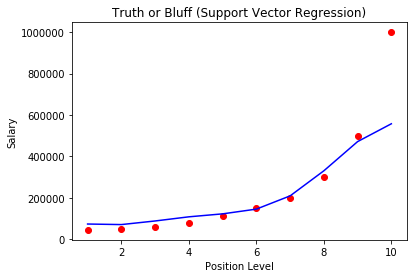

In [39]:
#Visualizing the SVR results
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), c='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), c='blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()